## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [2]:
df = df.drop(columns=['State'])
df['International plan'] = df['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Voice mail plan'] = df['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Churn'] = df['Churn'].apply(lambda x: int(x))

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [3]:
df.head(5)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
df.corr()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
International plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
Voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
Number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [5]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

In [6]:
y.value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [8]:
from sklearn.preprocessing import StandardScaler

num_columns = list(x_train.columns)
num_columns.remove('International plan')
num_columns.remove('Voice mail plan')


data_train = x_train[num_columns]
std_scaler = StandardScaler()
std_scaler.fit(data_train)

std_scaler_new = std_scaler.transform(data_train)
columns_std = [f'{col}_std' for col in num_columns]
x_train[columns_std] = std_scaler_new
x_train.drop(columns=num_columns, inplace=True)

data_test = x_test[num_columns]
std_scaler_new_test = std_scaler.transform(data_test)
columns_std_test = [f'{col}_std' for col in num_columns]
x_test[columns_std_test] = std_scaler_new_test
x_test.drop(columns=num_columns, inplace=True)

x_test

,International plan,Voice mail plan,Account length_std,Area code_std,Number vmail messages_std,Total day minutes_std,Total day calls_std,Total day charge_std,Total eve minutes_std,Total eve calls_std,Total eve charge_std,Total night minutes_std,Total night calls_std,Total night charge_std,Total intl minutes_std,Total intl calls_std,Total intl charge_std,Customer service calls_std
438,0,0,0.317071,1.740454,-0.585483,-0.459145,-0.383285,-0.459202,2.554012,0.296151,2.553707,-0.221317,1.177171,-0.222641,1.167234,-0.589331,1.173159,-0.426563
2674,0,0,-0.838516,-0.515843,-0.585483,-1.301479,0.823467,-1.301214,0.323924,1.192675,0.324097,-0.240954,2.096363,-0.240096,0.916387,0.634624,0.920994,-1.176504
1345,0,0,-0.059751,-0.515843,-0.585483,-3.303627,-5.059450,-3.303691,-0.814761,1.491516,-0.813885,-0.659222,-0.610146,-0.659013,-1.233728,-1.405302,-1.229039,1.823260
1957,0,0,1.171201,-0.682096,-0.585483,0.601571,-1.087224,0.601949,0.061908,-0.450952,0.062199,-0.873266,0.666509,-0.872836,-0.015329,-0.997316,-0.021304,-0.426563
2148,0,0,-0.109994,-0.682096,-0.585483,-0.661012,0.069247,-0.661069,0.467737,-1.347475,0.467793,0.530781,-0.456947,0.532282,-0.087000,1.042609,-0.087663,-0.426563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,0,0,-0.461694,-0.515843,-0.585483,-0.818835,0.069247,-0.818677,0.712022,1.093061,0.711150,-1.617509,-0.456947,-1.619032,2.600645,-0.181346,2.606514,-1.176504
2548,0,1,0.417557,-0.682096,0.945176,-0.492178,0.572061,-0.492667,1.228174,0.495379,1.227993,-1.289571,-0.763344,-1.287389,0.593870,1.042609,0.589199,-0.426563
2916,0,0,0.090978,-0.515843,-0.585483,-1.218897,-0.684973,-1.219172,-0.834461,-0.102304,-0.834744,-0.254700,-0.661212,-0.253187,0.092176,0.634624,0.098142,0.323378
2655,0,0,-0.913881,1.740454,-0.585483,0.719021,-1.388912,0.718535,-0.668978,-1.745930,-0.667871,-0.771153,0.972906,-0.772470,-0.087000,0.226639,-0.087663,-0.426563


После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr = LogisticRegression()
lr.fit(x_train, y_train)

svc = SVC(kernel='linear', probability=True)
svc.fit(x_train, y_train)

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [10]:
from sklearn.metrics import roc_auc_score

print(f'roc_auc lr train = {roc_auc_score(y_train, lr.predict_proba(x_train)[:, 1])}')
print(f'roc_auc lr test = {roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])}\n')

print(f'roc_auc svc train = {roc_auc_score(y_train, svc.predict_proba(x_train)[:, 1])}')
print(f'roc_auc svc test = {roc_auc_score(y_test, svc.predict_proba(x_test)[:, 1])}')

roc_auc lr train = 0.8185457926271363
roc_auc lr test = 0.8277043842971497

roc_auc svc train = 0.8002781795106403
roc_auc svc test = 0.7991530056874282


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [11]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(x_train, y_train)

print(f'roc_auc dtc train = {roc_auc_score(y_train, dtc.predict_proba(x_train)[:, 1])}')
print(f'roc_auc dtc test = {roc_auc_score(y_test, dtc.predict_proba(x_test)[:, 1])}')

roc_auc dtc train = 1.0
roc_auc dtc test = 0.8385447691165311


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
dtc_s = DecisionTreeClassifier(random_state=42)
dtc_s.fit(Xtrain, ytrain)

print(f'roc_auc dtc_s = {roc_auc_score(ytest, dtc_s.predict_proba(Xtest)[:, 1])}')

roc_auc dtc_s = 0.8414619219753408


Какой вывод про масштабирование признаков для обучения дерева можно сделать?

In [ ]:
# Изменения roc auc при маштабировании признаков минимальные. Для решающего дерева в маштабировании нет необходимости

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [25]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
   'C': list(np.arange(0.1, 10.1, 0.1)),
   'class_weight': [None, 'balanced'],
}
lr_g = LogisticRegression(random_state=42)

grid_search_lr = GridSearchCV(
   estimator=lr_g,
   param_grid=param_grid,
   scoring='roc_auc',
   cv=5,
   n_jobs=-1,
   verbose=True,
)

grid_search_lr.fit(x_train, y_train)

print(grid_search_lr.best_params_)

print(grid_search_lr.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
{'C': 2.9000000000000004, 'class_weight': 'balanced'}
0.807120280008327


In [17]:
best_lr = LogisticRegression(C=2.9, class_weight='balanced', random_state=42)
best_lr.fit(x_train, y_train)

print(f'roc_auc best_lr = {roc_auc_score(y_test, best_lr.predict_proba(x_test)[:, 1])}')

roc_auc best_lr = 0.8328451012231642


In [27]:
param_grid = {
   'C': list(np.arange(0.1, 10.1, 0.1)),
   'class_weight': [None, 'balanced'],
}
svc_g = SVC()

grid_search_svc = GridSearchCV(
   estimator=svc,
   param_grid=param_grid,
   scoring='roc_auc',
   cv=5,
   n_jobs=-1,
)

grid_search_svc.fit(x_train, y_train)

print(grid_search_svc.best_params_)

print(grid_search_svc.best_score_)

{'C': 1.1, 'class_weight': 'balanced'}
0.8844884899212264


In [16]:
best_svc = SVC(C=1.1, class_weight='balanced', kernel='linear', probability=True, random_state=42)
best_svc.fit(x_train, y_train)

print(f'roc_auc best_svc = {roc_auc_score(y_test, best_svc.predict_proba(x_test)[:, 1])}')

roc_auc best_svc = 0.8352073830486899


In [38]:
param_grid = {
   'max_depth': list(range(1, 11)),
   'criterion': ['gini', 'entropy'],
}
dtc_g = DecisionTreeClassifier(random_state=42)

grid_search_dtc_g = GridSearchCV(
   estimator=dtc_g,
   param_grid=param_grid,
   scoring='roc_auc',
   cv=5,
   n_jobs=-1,
)

grid_search_dtc_g.fit(x_train, y_train)

print(grid_search_dtc_g.best_params_)

print(grid_search_dtc_g.best_score_)

{'criterion': 'gini', 'max_depth': 5}
0.8755815788362422


In [12]:
best_dtc = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
best_dtc.fit(x_train, y_train)

print(f'roc_auc best_dtc = {roc_auc_score(y_test, best_dtc.predict_proba(x_test)[:, 1])}')

roc_auc best_dtc = 0.9072998180349405


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

In [ ]:
# Лучше всего по метрике roc auc справилась модель DecisionTreeClassifier: roc_auc = 0.91

Нарисуйте roc-кривую для наилучшей модели.

DecisionTreeClassifier: ROC AUC=0.907


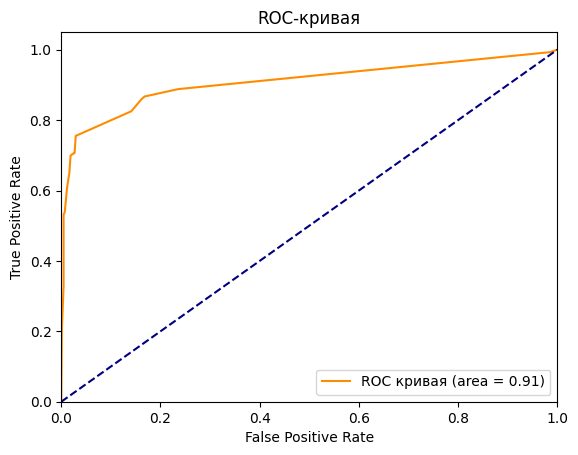

In [13]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

plt.figure(0).clf ()
dtc_probs = best_dtc.predict_proba(x_test)
dtc_probs = dtc_probs[:, 1]
dtc_auc = roc_auc_score(y_test, dtc_probs)
print('DecisionTreeClassifier: ROC AUC=%.3f' % (dtc_auc))

fpr, tpr, treshold = roc_curve(y_test, dtc_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

In [52]:
# DecisionTreeClassifier
difference_dtc = roc_auc_score(y_train, best_dtc.predict_proba(x_train)[:, 1]) - roc_auc_score(y_test, best_dtc.predict_proba(x_test)[:, 1])
print(f'difference_dtc={difference_dtc}')

# LogisticRegression
difference_lr = roc_auc_score(y_train, best_lr.predict_proba(x_train)[:, 1]) - roc_auc_score(y_test, best_lr.predict_proba(x_test)[:, 1])
print(f'difference_lr={difference_lr}')

# SVC
difference_svc = roc_auc_score(y_train, best_svc.predict_proba(x_train)[:, 1]) - roc_auc_score(y_test, best_svc.predict_proba(x_test)[:, 1])
print(f'difference_svc={difference_svc}')

difference_dtc=0.00493196378968086
difference_lr=-0.010238035316018634
difference_svc=-0.013121995958580435


In [ ]:
# Качество предсказаний на тестовых данных мало отличается у всех моделей, но меньше всего у DecisionTreeClassifier 0.005

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [20]:
dtc_imp_list = list(zip(x_train.columns, best_dtc.feature_importances_))
dtc_imp_list.sort(key=lambda x: x[1], reverse=True)
dtc_imp_list

[('Total day charge_std', 0.17822467050310764),
 ('Customer service calls_std', 0.15806072885426803),
 ('Total intl calls_std', 0.12294335473279645),
 ('Total day minutes_std', 0.12230987876232786),
 ('International plan', 0.11736939996248441),
 ('Total eve minutes_std', 0.11593431395049972),
 ('Total intl charge_std', 0.08150042773062523),
 ('Voice mail plan', 0.06000882910250144),
 ('Total night minutes_std', 0.017956647329122076),
 ('Total night calls_std', 0.0105776257075334),
 ('Total day calls_std', 0.004826374875710244),
 ('Total eve calls_std', 0.003944400598131476),
 ('Account length_std', 0.0034513505233650403),
 ('Total eve charge_std', 0.0028919973675270235),
 ('Area code_std', 0.0),
 ('Number vmail messages_std', 0.0),
 ('Total night charge_std', 0.0),
 ('Total intl minutes_std', 0.0)]

Text(0.5, 1.0, 'DecisionTreeClassifier feature_importances')

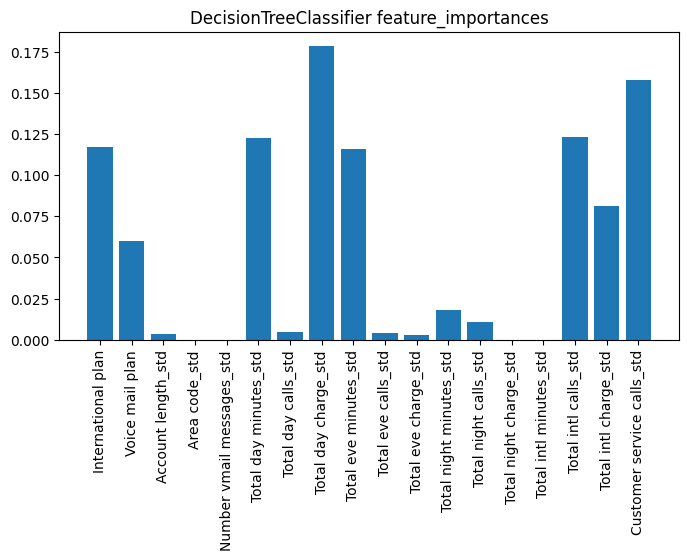

In [14]:
plt.figure(figsize=(8,4))
plt.bar(x_train.columns, best_dtc.feature_importances_)
plt.xticks(rotation=90)
plt.title('DecisionTreeClassifier feature_importances')

#### Логистическая регрессия (веса)

In [25]:
lr_imp_list = list(zip(best_lr.feature_names_in_, best_lr.coef_[0]))
lr_imp_list.sort(key=lambda x: x[1], reverse=True)
lr_imp_list

[('International plan', 2.394561253297183),
 ('Customer service calls_std', 0.7490255536007294),
 ('Number vmail messages_std', 0.33876550470275346),
 ('Total day charge_std', 0.3291863379300102),
 ('Total day minutes_std', 0.32762362337933576),
 ('Total eve minutes_std', 0.16129364875799992),
 ('Total eve charge_std', 0.15367584496196818),
 ('Total intl charge_std', 0.133849644253806),
 ('Total intl minutes_std', 0.11512850930667755),
 ('Area code_std', 0.08796595465710103),
 ('Total night minutes_std', 0.08510943410769654),
 ('Total night charge_std', 0.07467215640087611),
 ('Account length_std', 0.056491671834787933),
 ('Total eve calls_std', 0.016700977595443103),
 ('Total day calls_std', 0.006443058551283888),
 ('Total night calls_std', -9.853726775047072e-05),
 ('Total intl calls_std', -0.1601775026427359),
 ('Voice mail plan', -1.566447183700349)]

Text(0.5, 1.0, 'LogisticRegression веса')

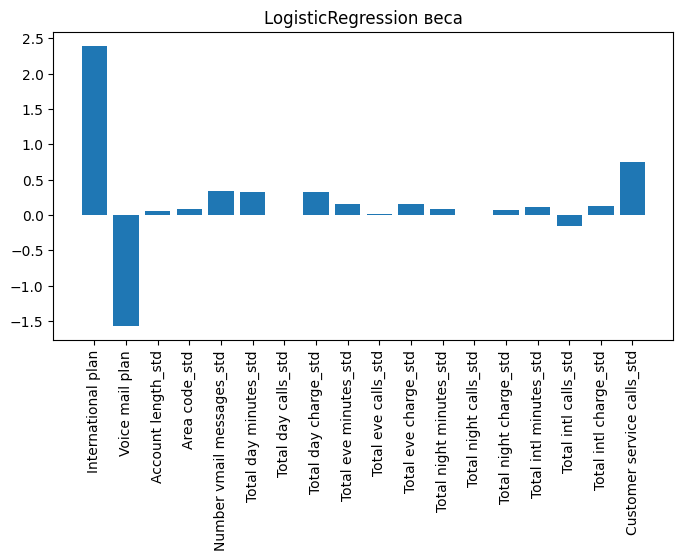

In [18]:
plt.figure(figsize=(8,4))
plt.bar(x_train.columns, best_lr.coef_[0])
plt.xticks(rotation=90)
plt.title('LogisticRegression веса')

#### Метод опорных векторов (веса)

In [26]:
svc_imp_list = list(zip(best_svc.feature_names_in_, best_svc.coef_[0]))
svc_imp_list.sort(key=lambda x: x[1], reverse=True)
svc_imp_list

[('International plan', 2.187378016279567),
 ('Customer service calls_std', 0.7128216722605636),
 ('Total day minutes_std', 0.3088366522138575),
 ('Total day charge_std', 0.30573008303397575),
 ('Total intl charge_std', 0.2630893344570513),
 ('Number vmail messages_std', 0.19892739008012672),
 ('Total eve minutes_std', 0.1657585804017352),
 ('Total eve charge_std', 0.12353531527424844),
 ('Total night minutes_std', 0.1127036089041038),
 ('Area code_std', 0.0684555479774307),
 ('Total night charge_std', 0.06743804362542605),
 ('Total eve calls_std', 0.039992436508109463),
 ('Account length_std', 0.03997232050273425),
 ('Total day calls_std', 0.03323597625914432),
 ('Total night calls_std', -0.028957846793082),
 ('Total intl minutes_std', -0.06051353112235347),
 ('Total intl calls_std', -0.10437520610486661),
 ('Voice mail plan', -1.1014152285408332)]

Text(0.5, 1.0, 'Метод опорных векторов (веса)')

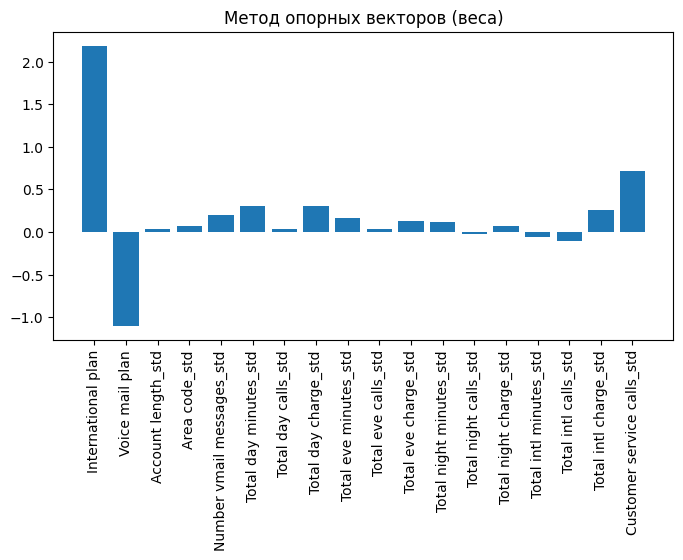

In [19]:
plt.figure(figsize=(8,4))
plt.bar(x_train.columns, best_svc.coef_[0])
plt.xticks(rotation=90)
plt.title('Метод опорных векторов (веса)')

Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

### Ответы

1. Данные несбалансированы, т.к класс 0 - 2850 значений, а класс 1 - 483.
Это может приводить к искажению модели и она будет лучше предсказывать класс 0, а меньший класс будет чаще игнорировать.

2. Лучше всего задачу решает модель DecisionTreeClassifier, где roc_auc = 0.91.


3. Для решающего дерева важными признаками являются ('Total day charge_std', 0.178),('Customer service calls_std', 0.158),('Total intl calls_std', 0.123),
Для логистической регрессии ('International plan', 2.395),('Customer service calls_std', 0.749), ('Voice mail plan', -1.566)
Для SVC ('International plan', 2.187), ('Customer service calls_std', 0.712), ('Voice mail plan', -1.101)

По важности признаки одинаковые у логистической регрессии и метода опорных векторов, как и roc auc у них примерно на одном уровне.
Для решающего дерева важные признаки другие, совпадение только по одному из трех признаков - Customer service calls_std. А вот почему для этой модели важные признаки другие?